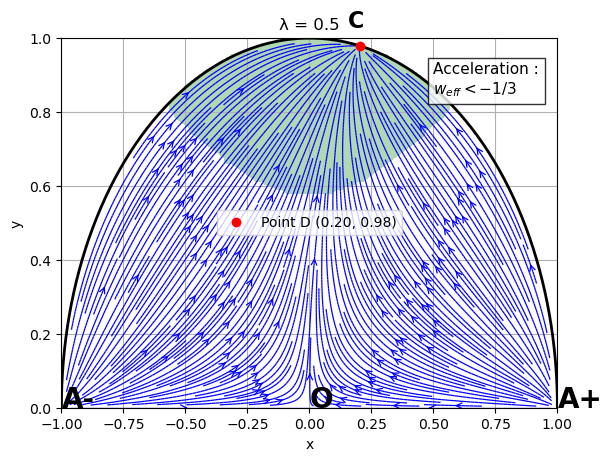

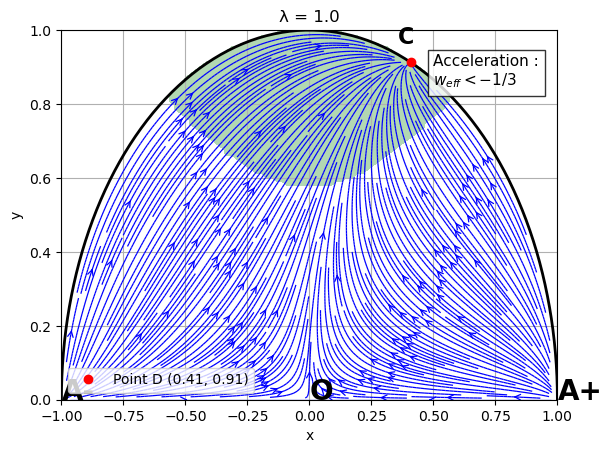

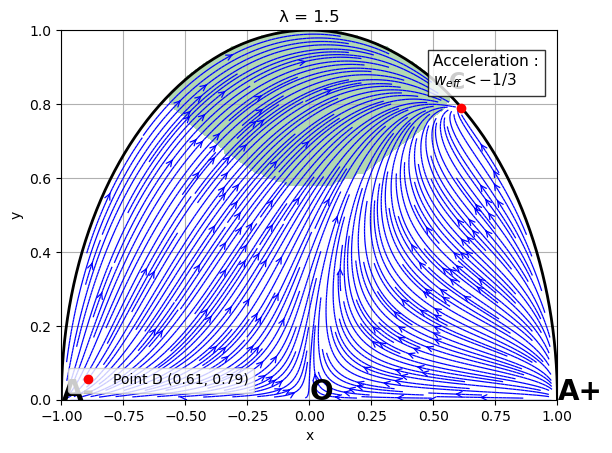

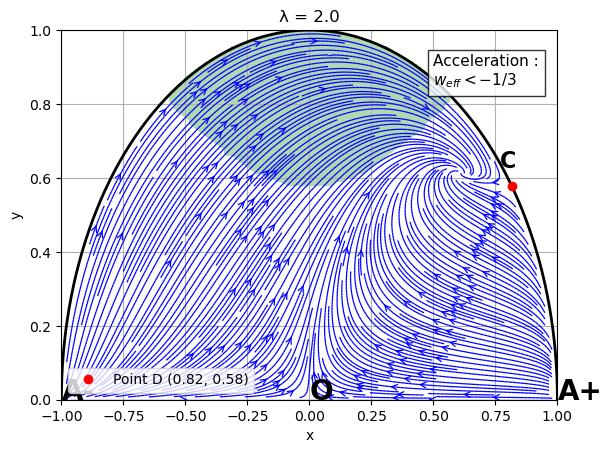

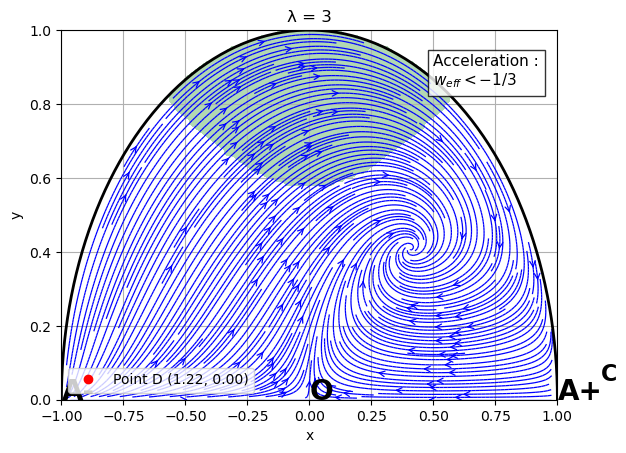

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of differential equations (for the vector field)
def system(x, y, lambda_val):
    dx_dt = -3*x + lambda_val*(np.sqrt(3/2))*y**2 + (3/2)*x*(1 + x**2 - y**2)
    dy_dt = -(np.sqrt(3/2))*lambda_val*x*y + (3/2)*y*(1 + x**2 - y**2)
    return dx_dt, dy_dt

# Values of lambda to plot
lambda_values = [0.5,1.0, 1.5, 2.0,3]

# Create a 2x2 subplot grid
#fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Create a meshgrid for the vector field
x = np.linspace(-1, 1, 100)  # Reduced resolution for less density
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Plot the semicircle boundary
theta = np.linspace(0, np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
# Iterate over lambda values and subplots
for i in range(5):
    lambda_val = lambda_values[i]
    # Compute the critical point D for the current lambda
    x_c = lambda_val / np.sqrt(6)
    y_c = np.sqrt(1 - (lambda_val**2) / 6) if lambda_val**2 <= 6 else 0  # Ensure y_c is real

    # Compute the vector field
    U, V = system(X, Y, lambda_val)

    # Mask points outside the semicircle
    mask = X**2 + Y**2 <= 1
    U = np.where(mask, U, np.nan)
    V = np.where(mask, V, np.nan)

    # Plot the streamlines with direction vectors
    plt.streamplot(X, Y, U, V, density=4, color='b', linewidth=0.9, arrowsize=1, arrowstyle='->')

    # Plot the semicircle boundary
    plt.plot(x_circle, y_circle, 'k-', linewidth=2)

    # Plot the critical point D
    plt.plot(x_c, y_c, 'ro', label=f'Point D ({x_c:.2f}, {y_c:.2f})')
    plt.text(x_c - 0.05, y_c + 0.05, 'C', fontsize=20)
    
    w_m = 0
    w_eff = X**2 - Y**2 + w_m *(1-X**2 - Y**2) 
    accln_reg = (w_eff < -1/3) & (Y>0) & (X**2 + Y**2 <=1)
    plt.contourf(X,Y,accln_reg, levels = [0.5,1.5],colors = 'green',alpha =0.3)
    plt.text(0.5,0.85,'Acceleration :\n$w_{{eff}}<-1/3$',
            fontsize=11,bbox = dict(facecolor='white',alpha=0.8))
    
    # Set labels and limits
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-1, 1])
    plt.ylim([0, 1])
    plt.grid(True)
    plt.legend()
    plt.title(f'λ = {lambda_val}')
    plt.text(0,0,'O',size=20)
    plt.text(-1,0,'A-',size=20)
    plt.text(1,0,'A+',size=20)
    plt.savefig(f'lambda{lambda_val}.png')
    plt.show() 
